In [1]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset= pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#HANDLING CATEGORICAL DATA

In [4]:
datasets = pd.read_csv('Social_Network_Ads.csv')
from sklearn.preprocessing import LabelEncoder
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)

[[97 1 19 19000]
 [392 1 35 20000]
 [155 0 26 43000]
 ...
 [130 0 50 20000]
 [305 1 36 33000]
 [45 0 49 36000]]


#GRAPHS

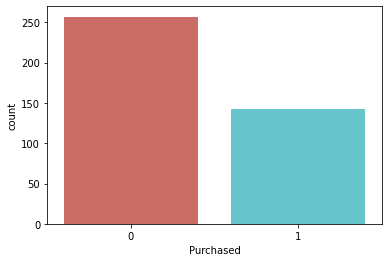

In [5]:
seaborn.countplot(x='Purchased',data=dataset, palette='hls')
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [6]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#NORMALIZING DATA

In [7]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#ALGORITHM

In [8]:
classifier = SVC(kernel = 'linear', random_state = 0)

#FITTING OF TRAINING DATA

In [9]:
classifier.fit(X_Train,Y_Train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [10]:
Y_Pred = classifier.predict(X_Test)

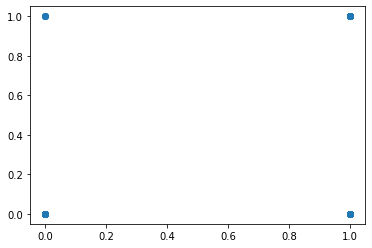

In [11]:
plt.scatter(Y_Test,Y_Pred)

#EVALUATION

In [12]:
print('Mean abolute error is:', metrics.mean_absolute_error(Y_Test,Y_Pred))
print('Mean squared error is:', metrics.mean_squared_error(Y_Test,Y_Pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(Y_Test,Y_Pred)))

Mean abolute error is: 0.11
Mean squared error is: 0.11
Root mean squared error is: 0.33166247903553997


In [14]:
print(metrics.accuracy_score(Y_Test, Y_Pred))

0.89


#SAVING THE MODEL USING PICKLE LIBRARY

In [15]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_Test) 


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [16]:
Y_Train = Y_Train[0:100]
cm = confusion_matrix(Y_Train, Y_Pred)
print(cm)

[[38 17]
 [35 10]]


Precision, Recall, Support, Fscore

In [17]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_Train, Y_Pred, average='macro')

(0.4454591577879249, 0.45656565656565656, 0.43576388888888884, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [18]:
results =confusion_matrix(Y_Test, Y_Pred)
print(results)

[[65  3]
 [ 8 24]]


Precision, Recall, Support, Fscore

In [19]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_Test, Y_Pred, average='macro')

(0.8896499238964992, 0.8529411764705883, 0.8677725688183675, None)